# Introduction

Movies are more than just entertainment—they are high-stakes projects where creative vision, financial investment, and audience reception collide. Understanding what drives a movie’s success is a central question for filmmakers, producers, and analysts alike. In this assignment, we take on the role of data detectives, using the **TMDB 5000 Movie Dataset** to uncover the hidden dynamics behind box office performance and audience ratings.

The dataset provides rich information on **budgets, revenues, genres, directors, casts, and ratings**, but it is not analysis-ready. It requires thoughtful cleaning and transformation before insights can be drawn. Once prepared, we will apply advanced visualization techniques to test our hypothesis and reveal patterns that explain why some films succeed while others fail.

Our objective is not only to generate plots, but to weave them into a **cohesive narrative**—a data story that explores how production budgets, genres, and directors influence movie outcomes. Through this process, we aim to move beyond descriptive statistics and build an evidence-based understanding of what makes a movie thrive in the competitive film industry.


# Dataset Overview

This study uses the **TMDB 5000 Movie Dataset**, composed of two linked files: 

1. **tmdb_5000_movies.csv**  
   - Covers key movie attributes:  
     - **Financials**: budget, revenue  
     - **Content**: genres, keywords, runtime, production companies  
     - **Audience metrics**: vote_average, vote_count  
     - **Temporal**: release_date  

2. **tmdb_5000_credits.csv**  
   - Details about people behind the films:  
     - **Cast**: actors with billing order  
     - **Crew**: includes directors and other roles  

By joining on **movie_id**, we obtain a complete view combining **financial performance, creative elements, audience reception, and production teams**.  
This integration enables deeper analysis of how budgets, genres, directors, and casts interact to influence **box office outcomes and ratings**.  

## ***Seven Commandments***
1. Color palette should be inclusive of the color-challenged audience.
2. Markers should stay relevant irrespective of the medium (printed,
browser, PDF, etc.).
3. Axes should be named appropriately.
4. Scale (lin/log) and units of the axes should be explicitly specified.
5. A legend should be present when more than one variable is
visualized.
6. A brief title (and sub-title) for the plot should be provided.
7. A short description of the plot’s story to make it self-explanatory.
Remember, your plots should speak for themselves
even in your absence!

##  Data Preprocessing and Hypothesis [10 points]

## Hypothesis
*Higher production budgets are strongly associated with higher box office revenue, but this relationship is moderated by genre and the presence of a proven director.*

### Primary Questions (direct tests of the hypothesis)
1) Budget-revenue strength
- How strong is the correlation between budget and revenue across all films?
- Is the budget-revenue relationship linear or does it show diminishing returns at higher budgets (log-log view)?

2) Genre moderation
- Does the budget-revenue correlation differ significantly across the top 5–10 genres?
- Which genres yield the highest average revenue-to-budget ratio (profitability proxy)?

3) Director influence
- Do films by the top 5 most prolific directors have significantly different rating distributions (vote_average)?
- Among those directors, do higher ratings correspond to higher revenues after controlling for budget bins?

4) Time dynamics
- Has the average budget, revenue, and number of releases changed over time, and does the budget-revenue relationship strengthen/loosen by decade?
- Which genres grew the most over time, and does their growth align with revenue outcomes?

5) Pre-release predictors
- Using only pre-release attributes (budget, genre, primary cast size, director), which features most strongly predict revenue? (Correlations/feature importance proxy—not full ML)

## Secondary Questions (explanatory/contextual)
6) Ratings vs commercial success
- How correlated are vote_average and revenue? Are high-rated films always commercially successful?

7) Runtime effects
- Is there any meaningful relationship between runtime and ratings or revenue?

8) Cast scale
- Do films with larger credited casts (number_of_actors) have higher revenues or ratings after controlling for budget?

9) Outliers and risk
- Which movies are high-budget underperformers and low-budget overperformers? What genres/directors do they belong to?

10) Studio/process angle (if production_companies available)
- Do the top production companies show consistently higher revenue-to-budget ratios compared to others?

11) Budget thresholds
- Is there a noticeable threshold (e.g., $50M, $100M) after which revenue increases sharply or flattens?

12) Genre profitability variability
- Which genres show the highest variance in revenue (i.e., risk)? Are some genres “safer” in revenue outcomes?

13) International vs domestic proxy
- If only total revenue is available, do genres with traditionally strong international appeal (e.g., Action) drive higher revenues relative to others for similar budgets?

14) Release-year anomalies
- Are there specific years where genre mixes or macro factors drove atypical revenue outcomes (e.g., spikes/dips)?

15) Title-level drivers (optional deep dive)
- Within a single prolific director, does budget still drive revenue, or does the director signal dominate?

In [419]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
from ast import literal_eval
from datetime import datetime
from pathlib import Path
from collections import Counter
from matplotlib.ticker import FuncFormatter

# Configure plotting
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="colorblind")
plt.rcParams.update({"figure.figsize":(10,6), "axes.titlesize":14, "axes.labelsize":12})

%matplotlib inline

## Load the Dataset

In [420]:
# Load both datasets
movies_df = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits_df = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')

print('Movies shape:', movies_df.shape)
print('Credits shape:', credits_df.shape)

Movies shape: (4803, 20)
Credits shape: (4803, 4)


In [421]:
# Inspect schema and missingness
display(movies_df.head(3))
display(movies_df.info())
display(movies_df.isna().sum().sort_values(ascending=False).head(10))
display(movies_df.describe())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

None

homepage            3091
tagline              844
overview               3
runtime                2
release_date           1
budget                 0
vote_average           0
title                  0
status                 0
spoken_languages       0
dtype: int64

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [422]:
display(credits_df.head(3))
display(credits_df.info())
display(credits_df.isna().sum())
display(credits_df.describe())

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


None

movie_id    0
title       0
cast        0
crew        0
dtype: int64

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


### Merge datasets for data processing

In [423]:
# merging the two files
merged_movies_df = pd.merge(movies_df, credits_df, left_on ='id', right_on='movie_id', how='left', suffixes=('', '_y'))
merged_movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

In [424]:
display(merged_movies_df.head(3))
display(merged_movies_df.info())
display(merged_movies_df.isna().sum())
display(merged_movies_df.describe())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

None

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [425]:
import pprint
pp = pprint.PrettyPrinter(width=120, indent=2)

row = merged_movies_df.iloc[0].to_dict()
for key, value in row.items():
    print(f"\n--- {key.upper()} ---")
    pp.pprint(value)


--- BUDGET ---
237000000

--- GENRES ---
('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": '
 '"Science Fiction"}]')

--- HOMEPAGE ---
'http://www.avatarmovie.com/'

--- ID ---
19995

--- KEYWORDS ---
('[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": '
 '3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, '
 '"name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": '
 '"alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, '
 '{"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, '
 '"name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": '
 '206690, "name": "mind and soul"},

## Data Cleaning

* Missing Values: Identify and address missing values in key columns, such as
budget, revenue, and runtime. Decide whether to drop rows or fill missing values,
and justify your choice.
* Data Transformation: The genres and cast columns contain JSON strings. You
must extract and transform this data into a usable format by creating new
columns (e.g., primary_genre, number_of_actors).

In [426]:
df = merged_movies_df.copy()
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [427]:
def parse_json_field(x):
    if pd.isna(x): return []
    if isinstance(x, (list, dict)): return x
    s = str(x).strip()
    try:
        return ast.literal_eval(s)
    except:
        try:
            return json.loads(s)
        except:
            try:
                i, j = s.find("["), s.rfind("]")
                return ast.literal_eval(s[i:j+1]) if i!=-1 and j!=-1 else []
            except:
                try: return json.loads(s.replace("'", '"'))
                except: return []

In [428]:
cols = ["genres","keywords","production_companies","production_countries","spoken_languages","cast","crew"]
for c in cols:
    df[c + "_parsed"] = df[c].apply(parse_json_field)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title_y,cast,crew,genres_parsed,keywords_parsed,production_companies_parsed,production_countries_parsed,spoken_languages_parsed,cast_parsed,crew_parsed
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...","[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{'id': 28, 'name': 'A

In [429]:
# extract simple name lists
df["genres_names"] = df["genres_parsed"].apply(lambda L: [d.get("name") for d in L if isinstance(d,dict) and d.get("name")])
df["keywords_names"] = df["keywords_parsed"].apply(lambda L: [d.get("name") for d in L if isinstance(d,dict) and d.get("name")])
df["prod_companies_names"] = df["production_companies_parsed"].apply(lambda L: [d.get("name") for d in L if isinstance(d,dict) and d.get("name")])
df["prod_countries_names"] = df["production_countries_parsed"].apply(lambda L: [d.get("name") for d in L if isinstance(d,dict) and d.get("name")])
df["spoken_languages_names"] = df["spoken_languages_parsed"].apply(lambda L: [d.get("name") for d in L if isinstance(d,dict) and d.get("name")])

# cast: names + counts + gender breakdown
df["cast_names"] = df["cast_parsed"].apply(lambda L: [d.get("name") for d in L if isinstance(d,dict) and d.get("name")])
df["cast_count"] = df["cast_names"].apply(len)
df["cast_male_count"] = df["cast_parsed"].apply(lambda L: sum(1 for d in L if isinstance(d,dict) and d.get("gender")==2))
df["cast_female_count"] = df["cast_parsed"].apply(lambda L: sum(1 for d in L if isinstance(d,dict) and d.get("gender")==1))
df["cast_unknown_count"] = df["cast_parsed"].apply(lambda L: sum(1 for d in L if isinstance(d,dict) and d.get("gender") in (0,None)))

# crew -> directors (list) and primary_director
df["directors"] = df["crew_parsed"].apply(lambda L: [d.get("name") for d in L if isinstance(d,dict) and d.get("job") and "director" in d.get("job").lower()])
df["primary_director"] = df["directors"].apply(lambda L: L[0] if L else pd.NA)

# helper to make freq df (counts by number of movies they appear in)
def freq_df(series_of_lists, name_col):
    ctr = Counter()
    for lst in series_of_lists:
        if not lst: continue
        for item in set([x for x in lst if x]): ctr[item] += 1
    return pd.DataFrame(ctr.items(), columns=[name_col, "movie_count"]).sort_values("movie_count", ascending=False).reset_index(drop=True)

genres_df = freq_df(df["genres_names"], "genre")
keywords_df = freq_df(df["keywords_names"], "keyword")
companies_df = freq_df(df["prod_companies_names"], "company")
countries_df = freq_df(df["prod_countries_names"], "country")
languages_df = freq_df(df["spoken_languages_names"], "language")
actors_df = freq_df(df["cast_names"], "actor")
directors_df = freq_df(df["directors"], "director")

In [430]:
display(genres_df)
display(keywords_df)
display(countries_df)
display(languages_df)
display(actors_df)
display(directors_df)

,genre,movie_count
0,Drama,2297
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


,keyword,movie_count
0,woman director,324
1,independent film,318
2,duringcreditsstinger,307
3,based on novel,197
4,murder,189
...,...,...
9808,materialism,1
9809,out of control,1
9810,missing woman,1
9811,ordensbruder,1


,country,movie_count
0,United States of America,3956
1,United Kingdom,636
2,Germany,324
3,France,306
4,Canada,261
...,...,...
83,Monaco,1
84,Fiji,1
85,Serbia and Montenegro,1
86,Turkey,1


,language,movie_count
0,English,4485
1,Français,437
2,Español,351
3,Deutsch,262
4,Italiano,188
...,...,...
56,বাংলা,1
57,Català,1
58,??????,1
59,Bamanankan,1


,actor,movie_count
0,Samuel L. Jackson,67
1,Robert De Niro,57
2,Bruce Willis,51
3,Matt Damon,48
4,Morgan Freeman,46
...,...,...
54196,Chip Hormess,1
54197,Jackson Browne,1
54198,Ghostface Killah,1
54199,Morven Christie,1


,director,movie_count
0,Dean Semler,33
1,Roger Deakins,30
2,Steven Spielberg,27
3,Robert Richardson,26
4,Mark Irwin,25
...,...,...
5256,Gary Halvorson,1
5257,Guy Green,1
5258,Nicholas Ray,1
5259,Stephanie Rass,1


In [431]:
def top_coverage(df, col, threshold=0.8):
    df = df.sort_values("movie_count", ascending=False)
    df["cum_share"] = df["movie_count"].cumsum() / df["movie_count"].sum()
    return df[df["cum_share"] <= threshold][col].tolist()

top_genres    = top_coverage(genres_df, "genre")
top_keywords  = top_coverage(keywords_df, "keyword")
top_countries = top_coverage(countries_df, "country")
top_langs     = top_coverage(languages_df, "language")
top_actors    = top_coverage(actors_df, "actor")
top_directors = top_coverage(directors_df, "director")

In [432]:
top_genres

['Drama',
 'Comedy',
 'Thriller',
 'Action',
 'Romance',
 'Adventure',
 'Crime',
 'Science Fiction']

In [433]:
# one-hot encode into movies_df
def one_hot_encode_list(df, col, top_list, prefix):
    for val in top_list:
        df[f"{prefix}_{val}"] = df[col].apply(lambda x: int(val in x))
    return df

In [434]:
df = one_hot_encode_list(df, "genres", top_genres, "genre")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,directors,primary_director,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Adventure,genre_Crime,genre_Science Fiction
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[James Cameron, Kevin Ishioka, Kim Sinclair, M...",James Cameron,0,0,0,1,0,1,0,1
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[Dariusz Wolski, Gore Verbinski]",Dariusz Wolski,0,0,0,1,0,1,0,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[Sam Mendes, Chris Lowe, Roxana Alexandru , Ho...",Sam Mendes,0,0,0,1,0,1,1,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[Christopher Nolan, Wally Pfister, Naaman Mars...",Christopher Nolan,1,0,1,1,0,0,1,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[Andrew Stanton, Daniel Mindel, Naaman Marshal...",Andrew Stanton,0,0,0,1,0,1,0,1


In [435]:
len(top_keywords)

3538

In [436]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew', 'genres_parsed',
       'keywords_parsed', 'production_companies_parsed',
       'production_countries_parsed', 'spoken_languages_parsed', 'cast_parsed',
       'crew_parsed', 'genres_names', 'keywords_names', 'prod_companies_names',
       'prod_countries_names', 'spoken_languages_names', 'cast_names',
       'cast_count', 'cast_male_count', 'cast_female_count',
       'cast_unknown_count', 'directors', 'primary_director', 'genre_Drama',
       'genre_Comedy', 'genre_Thriller', 'genre_Action', 'genre_Romance',
       'genre_Adventure', 'genre_Crime', 'genre_Science Fiction'],
      dtype='object')

In [437]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# ---- Step 1: restrict to top keywords ----
top_keywords = keywords_df.sort_values("movie_count", ascending=False).head(500)  # e.g. 500
kw_list = top_keywords["keyword"].tolist()

# ---- Step 2: Vectorize keywords ----
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(kw_list)

# ---- Step 3: Cluster keywords (choose ~50 clusters) ----
n_clusters = 50
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

top_keywords["cluster"] = clusters

# ---- Step 4: Name clusters by top keyword in that cluster ----
cluster_names = (
    top_keywords.groupby("cluster")["keyword"]
    .first()
    .to_dict()
)

top_keywords["cluster_name"] = top_keywords["cluster"].map(cluster_names)

# ---- Step 5: Map ALL keywords into cluster or "Other" ----
def map_to_cluster(kw):
    if kw in top_keywords["keyword"].values:
        return top_keywords.loc[top_keywords["keyword"] == kw, "cluster_name"].iloc[0]
    else:
        return "Other"

keywords_df["cluster_final"] = keywords_df["keyword"].apply(map_to_cluster)

In [438]:
from sklearn.preprocessing import MultiLabelBinarizer

df["kw_clusters"] = df["keywords_names"].apply(
    lambda kws: [map_to_cluster(kw) for kw in kws] if isinstance(kws, list) else []
)

mlb = MultiLabelBinarizer()
kw_cluster_ohe = pd.DataFrame(
    mlb.fit_transform(df["kw_clusters"]),
    columns=[f"kw_{c}" for c in mlb.classes_],
    index=df.index
)

df = pd.concat([df, kw_cluster_ohe], axis=1)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,kw_suicide,kw_supernatural,kw_sword and sorcery,kw_time travel,kw_usa president,kw_violence,kw_war,kw_wife husband relationship,kw_woman director,kw_world war ii
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,0,0,0,0,0,0,1,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,0,0,0,0,0,0,1,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,0,0,0,0,0,0,1,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,0,0,0,0,0,0,1,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,0,0,0,0,0,0,1,0


In [439]:
df = one_hot_encode_list(df, "production_countries", top_countries, "country")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,kw_time travel,kw_usa president,kw_violence,kw_war,kw_wife husband relationship,kw_woman director,kw_world war ii,country_United States of America,country_United Kingdom,country_Germany
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,0,0,0,1,0,1,1,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,0,0,0,1,0,1,0,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,0,0,0,1,0,1,1,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,0,0,0,1,0,1,0,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,0,0,0,1,0,1,0,0


In [440]:
df = one_hot_encode_list(df, "spoken_languages", top_langs, "lang")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,kw_war,kw_wife husband relationship,kw_woman director,kw_world war ii,country_United States of America,country_United Kingdom,country_Germany,lang_English,lang_Français,lang_Español
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,1,0,1,1,0,1,0,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,1,0,1,0,0,1,0,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,1,0,1,1,0,1,0,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,1,0,1,0,0,1,0,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,1,0,1,0,0,1,0,0


In [441]:
# ---- ACTORS ----
top_actors = df.explode("cast_names")["cast_names"].value_counts().head(100).index
df["cast_top"] = df["cast_names"].apply(lambda lst: [a if a in top_actors else "Other" for a in lst])

# One-hot encode top actors
for actor in top_actors:
    df[f"actor_{actor}"] = df["cast_top"].apply(lambda lst: int(actor in lst))

# Aggregate cast stats
df["cast_count"] = df["cast_names"].apply(lambda x: len(x) if isinstance(x, list) else 0)
df["cast_male_count"] = df.get("cast_male_count", 0)  # assume already parsed
df["cast_female_count"] = df.get("cast_female_count", 0)
df["cast_unknown_count"] = df["cast_count"] - df["cast_male_count"] - df["cast_female_count"]

# ---- DIRECTORS ----
top_directors = df.explode("directors")["directors"].value_counts().head(50).index
df["directors_top"] = df["directors"].apply(lambda lst: [d if d in top_directors else "Other" for d in lst])

# One-hot encode top directors
for director in top_directors:
    df[f"director_{director}"] = df["directors_top"].apply(lambda lst: int(director in lst))

# Aggregate director stats
df["num_directors"] = df["directors"].apply(lambda x: len(x) if isinstance(x, list) else 0)
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,director_John Toll,director_Robert D. Yeoman,director_Stephen Goldblatt,director_Renny Harlin,director_Matthew Libatique,director_John R. Leonetti,director_Jack Green,director_Andrzej Bartkowiak,director_Michael Chapman,num_directors
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,0,0,0,0,0,0,0,0,0,13
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,0,0,0,0,0,0,0,0,0,2
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,0,0,0,0,0,0,0,0,9
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,0,0,0,0,0,0,0,0,0,9
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,0,0,0,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,0,0,0,0,0,0,0,0,0,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,0,0,0,0,0,0,0,0,0,1
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,0,0,0,0,0,0,0,0,0,2
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],...,0,0,0,0,0,0,0,0,0,1


In [442]:
# Print all columns with their data type
for i, col in enumerate(df.columns):
    print(f"{i}: {col} ({df[col].dtype})")

0: budget (int64)
1: genres (object)
2: homepage (object)
3: id (int64)
4: keywords (object)
5: original_language (object)
6: original_title (object)
7: overview (object)
8: popularity (float64)
9: production_companies (object)
10: production_countries (object)
11: release_date (object)
12: revenue (int64)
13: runtime (float64)
14: spoken_languages (object)
15: status (object)
16: tagline (object)
17: title (object)
18: vote_average (float64)
19: vote_count (int64)
20: movie_id (int64)
21: title_y (object)
22: cast (object)
23: crew (object)
24: genres_parsed (object)
25: keywords_parsed (object)
26: production_companies_parsed (object)
27: production_countries_parsed (object)
28: spoken_languages_parsed (object)
29: cast_parsed (object)
30: crew_parsed (object)
31: genres_names (object)
32: keywords_names (object)
33: prod_companies_names (object)
34: prod_countries_names (object)
35: spoken_languages_names (object)
36: cast_names (object)
37: cast_count (int64)
38: cast_male_count (i

In [443]:
cols_to_drop = [
    'genres', 'keywords', 'production_companies', 'production_countries',
    'spoken_languages', 'cast', 'crew'
]

df = df.drop(columns=cols_to_drop)
df.head()

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,director_John Toll,director_Robert D. Yeoman,director_Stephen Goldblatt,director_Renny Harlin,director_Matthew Libatique,director_John R. Leonetti,director_Jack Green,director_Andrzej Bartkowiak,director_Michael Chapman,num_directors
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,...,0,0,0,0,0,0,0,0,0,13
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,...,0,0,0,0,0,0,0,0,0,2
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,...,0,0,0,0,0,0,0,0,0,9
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,...,0,0,0,0,0,0,0,0,0,9
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,...,0,0,0,0,0,0,0,0,0,11


In [444]:
# Drop rows where budget or revenue is missing
df = df.dropna(subset=['budget', 'revenue'])
df

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,director_John Toll,director_Robert D. Yeoman,director_Stephen Goldblatt,director_Renny Harlin,director_Matthew Libatique,director_John R. Leonetti,director_Jack Green,director_Andrzej Bartkowiak,director_Michael Chapman,num_directors
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,...,0,0,0,0,0,0,0,0,0,13
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,...,0,0,0,0,0,0,0,0,0,2
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,...,0,0,0,0,0,0,0,0,0,9
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,...,0,0,0,0,0,0,0,0,0,9
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,...,0,0,0,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,...,0,0,0,0,0,0,0,0,0,2
4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,...,0,0,0,0,0,0,0,0,0,1
4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,...,0,0,0,0,0,0,0,0,0,2
4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,...,0,0,0,0,0,0,0,0,0,1


In [445]:
# Fill missing runtime with median
df['runtime'] = df['runtime'].fillna(df['runtime'].median())
df

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,director_John Toll,director_Robert D. Yeoman,director_Stephen Goldblatt,director_Renny Harlin,director_Matthew Libatique,director_John R. Leonetti,director_Jack Green,director_Andrzej Bartkowiak,director_Michael Chapman,num_directors
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,...,0,0,0,0,0,0,0,0,0,13
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,...,0,0,0,0,0,0,0,0,0,2
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,...,0,0,0,0,0,0,0,0,0,9
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,...,0,0,0,0,0,0,0,0,0,9
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,...,0,0,0,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,...,0,0,0,0,0,0,0,0,0,2
4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,...,0,0,0,0,0,0,0,0,0,1
4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,...,0,0,0,0,0,0,0,0,0,2
4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,...,0,0,0,0,0,0,0,0,0,1


In [446]:
# Primary genre (first from parsed list)
df['primary_genre'] = df['genres_names'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

# Number of actors
df['num_actors'] = df['cast_count']
df

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,director_Stephen Goldblatt,director_Renny Harlin,director_Matthew Libatique,director_John R. Leonetti,director_Jack Green,director_Andrzej Bartkowiak,director_Michael Chapman,num_directors,primary_genre,num_actors
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,...,0,0,0,0,0,0,0,13,Action,83
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,...,0,0,0,0,0,0,0,2,Adventure,34
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,...,0,0,0,0,0,0,0,9,Action,83
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,...,0,0,0,0,0,0,0,9,Action,158
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,...,0,0,0,0,0,0,0,11,Action,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,...,0,0,0,0,0,0,0,2,Action,7
4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,...,0,0,0,0,0,0,0,1,Comedy,5
4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,...,0,0,0,0,0,0,0,2,Comedy,7
4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,...,0,0,0,0,0,0,0,1,Unknown,5


In [447]:
# Parse dates for time dynamics
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["year"]   = df["release_date"].dt.year
df["decade"] = (df["year"]//10)*10
df.head()

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,director_Matthew Libatique,director_John R. Leonetti,director_Jack Green,director_Andrzej Bartkowiak,director_Michael Chapman,num_directors,primary_genre,num_actors,year,decade
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,...,0,0,0,0,0,13,Action,83,2009.0,2000.0
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,...,0,0,0,0,0,2,Adventure,34,2007.0,2000.0
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,...,0,0,0,0,0,9,Action,83,2015.0,2010.0
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,...,0,0,0,0,0,9,Action,158,2012.0,2010.0
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,...,0,0,0,0,0,11,Action,27,2012.0,2010.0


In [448]:
# ---------- Transformations for analyses ----------
df["log_budget"]   = np.log1p(df["budget"])    # log1p → diminishing returns view
df["log_revenue"]  = np.log1p(df["revenue"])
df["rev_to_budget"] = (df["revenue"] / df["budget"]).replace([np.inf, -np.inf], np.nan)
df.head()

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,director_Andrzej Bartkowiak,director_Michael Chapman,num_directors,primary_genre,num_actors,year,decade,log_budget,log_revenue,rev_to_budget
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,...,0,0,13,Action,83,2009.0,2000.0,19.283571,21.748578,11.763566
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,...,0,0,2,Adventure,34,2007.0,2000.0,19.519293,20.683485,3.203333
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,...,0,0,9,Action,83,2015.0,2010.0,19.316769,20.596199,3.594590
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,...,0,0,9,Action,158,2012.0,2010.0,19.336971,20.804790,4.339756
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,...,0,0,11,Action,27,2012.0,2010.0,19.376192,19.464974,1.092843


In [449]:
# Print all columns with their data type
for i, col in enumerate(df.columns):
    print(f"{i}: {col} ({df[col].dtype})")

0: budget (int64)
1: homepage (object)
2: id (int64)
3: original_language (object)
4: original_title (object)
5: overview (object)
6: popularity (float64)
7: release_date (datetime64[ns])
8: revenue (int64)
9: runtime (float64)
10: status (object)
11: tagline (object)
12: title (object)
13: vote_average (float64)
14: vote_count (int64)
15: movie_id (int64)
16: title_y (object)
17: genres_parsed (object)
18: keywords_parsed (object)
19: production_companies_parsed (object)
20: production_countries_parsed (object)
21: spoken_languages_parsed (object)
22: cast_parsed (object)
23: crew_parsed (object)
24: genres_names (object)
25: keywords_names (object)
26: prod_companies_names (object)
27: prod_countries_names (object)
28: spoken_languages_names (object)
29: cast_names (object)
30: cast_count (int64)
31: cast_male_count (int64)
32: cast_female_count (int64)
33: cast_unknown_count (int64)
34: directors (object)
35: primary_director (object)
36: genre_Drama (int64)
37: genre_Comedy (int64)

## Visualizations

In [450]:
df_final = df.copy()

In [451]:
# --- Leveraging Your OHE Columns ---

# 1. Identify the OHE director columns you created (indices 204 to 253)
ohe_director_cols = [col for col in df.columns if col.startswith('director_')]

# 2. Create a powerful 'has_top_director' flag
# A movie has a top director if ANY of the OHE director columns is 1.
df['has_top_director'] = df[ohe_director_cols].sum(axis=1) > 0

# 3. Identify the OHE actor columns (indices 103 to 202)
ohe_actor_cols = [col for col in df.columns if col.startswith('actor_')]

# 4. Create a 'has_top_actor' flag for a bonus analysis
df['has_top_actor'] = df[ohe_actor_cols].sum(axis=1) > 0


# --- Data Cleaning for Visualizations ---
# Filter out movies with zero budget/revenue which are impractical for this analysis
df_viz = df[(df['budget'] > 1000) & (df['revenue'] > 1000)].copy()

# --- Helper Function for Formatting Currency Axes ---
def currency_formatter(x, pos):
    'Formats tick values as $10M, $1B, etc.'
    if x >= 1e9:
        return f'${x*1e-9:.1f}B'
    if x >= 1e6:
        return f'${x*1e-6:.0f}M'
    return f'${x:,.0f}'

currency_ticker = FuncFormatter(currency_formatter)

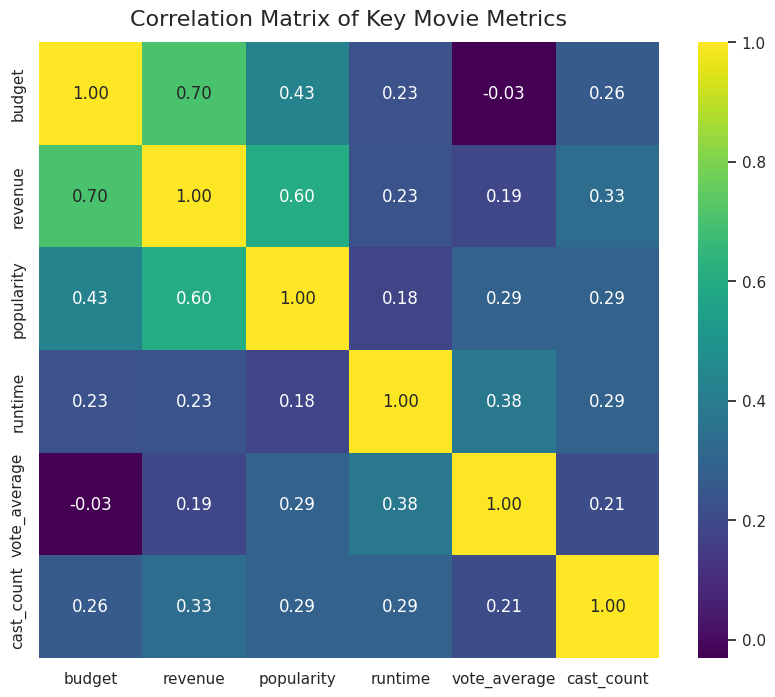

In [452]:
cols_for_heatmap = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'cast_count']
corr_matrix = df_viz[cols_for_heatmap].corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
heatmap.set_title('Correlation Matrix of Key Movie Metrics', fontdict={'fontsize':16}, pad=12)
plt.show()

### Correlation Matrix – Heatmap
We compute correlations across key movie metrics: budget, revenue, popularity, runtime, vote average, and cast count.  

- **Insight:** Budget and revenue are highly correlated (**0.70**), confirming the central hypothesis.  
- Popularity also shows a moderate positive correlation with both budget and revenue, while runtime and vote average are only weakly correlated.  
- Cast count has a small positive link with revenue, suggesting that larger casts don’t guarantee success.  

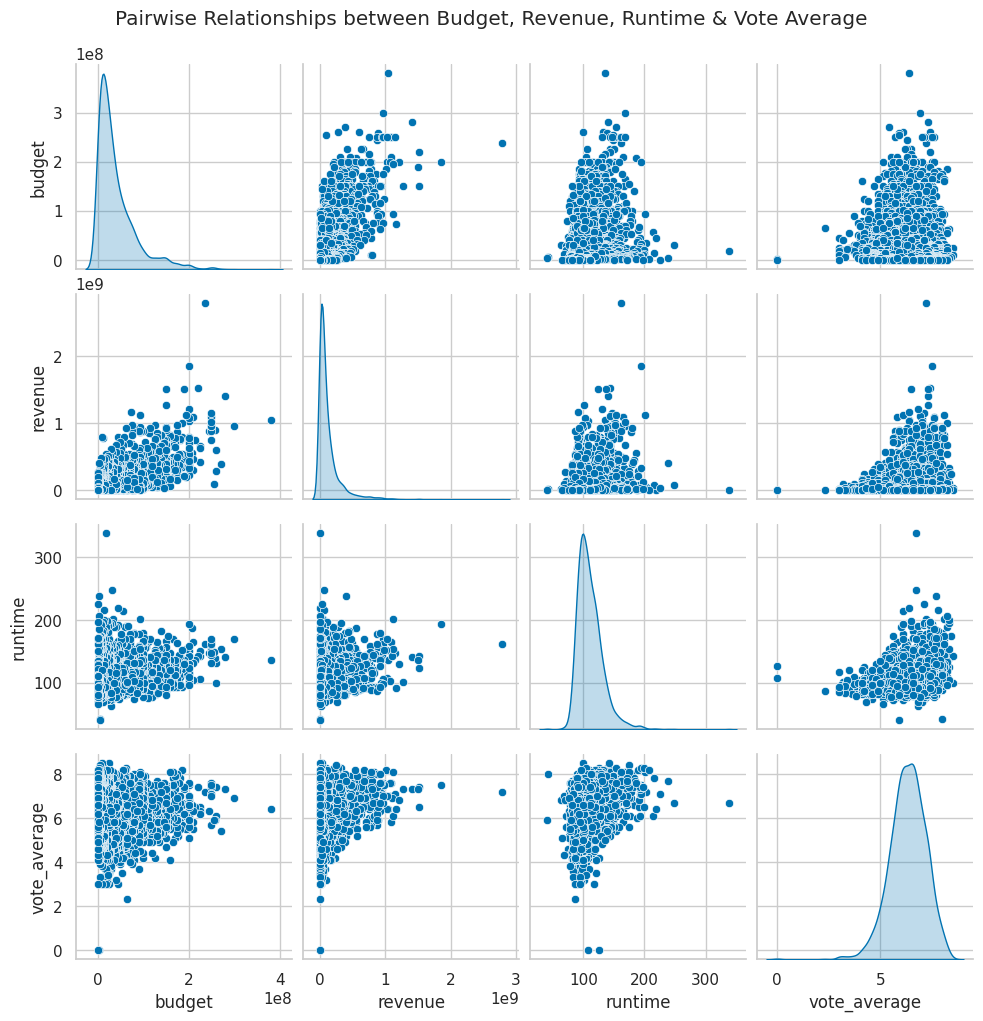

In [453]:
#  Distribution of Success - Pair Plot
numerical_cols = ['budget', 'revenue', 'runtime', 'vote_average']
pair_plot = sns.pairplot(df_viz[numerical_cols], kind='scatter', diag_kind='kde', palette='colorblind')
pair_plot.fig.suptitle("Pairwise Relationships between Budget, Revenue, Runtime & Vote Average", y=1.02)
plt.show()

### Distribution of Success – Pair Plot
We visualize the relationships between budget, revenue, runtime, and vote average using a pair plot.  

- **Insight:** A strong upward trend appears between budget and revenue, reinforcing our hypothesis that higher budgets generally lead to higher box office returns.  
- **Moderation factors:** Runtime and vote average show weaker associations with revenue, suggesting they play a smaller role compared to budget.  

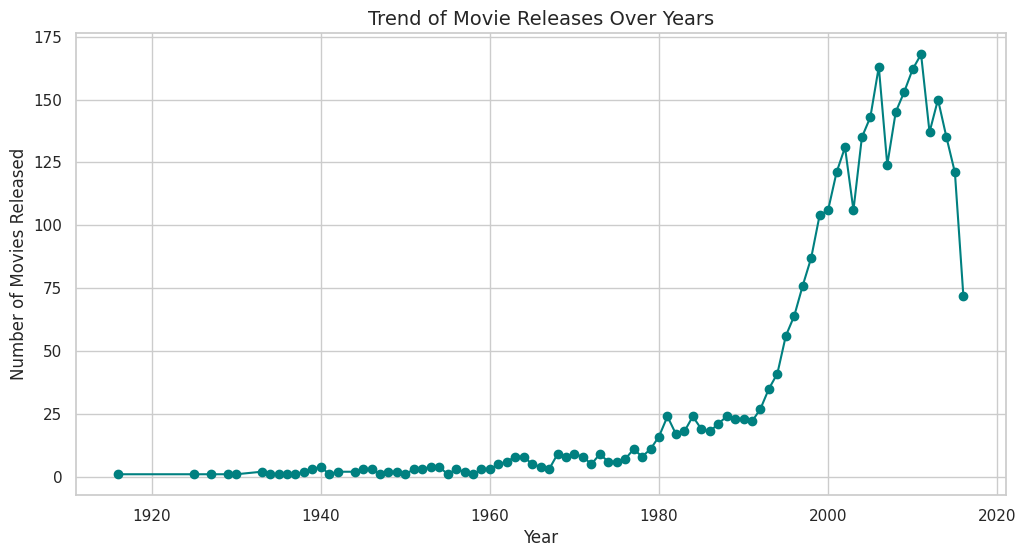

In [455]:
# Number of movies released per year
movies_per_year = df_viz.groupby('year')['id'].count()
plt.figure(figsize=(12,6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', color='teal')
plt.title("Trend of Movie Releases Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.yscale("linear")
plt.grid(True)
plt.show()

The line plot shows the trend of movie releases over time. We observe a slow but steady growth until the 1970s, followed by a sharp increase from the 1990s onward, peaking in the 2000s. This indicates the film industry’s expansion and the rising availability of production budgets. In relation to our hypothesis, this growing number of releases suggests increased competition across genres, making it important to test whether higher budgets consistently lead to higher revenues or whether genre-specific patterns moderate this relationship.

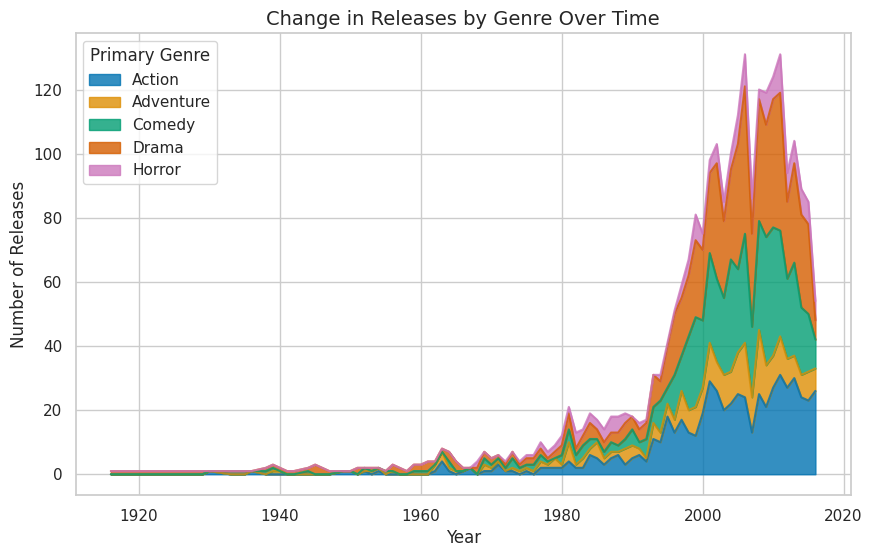

In [456]:
# (b) Stacked area for top 5 genres
top5 = df_viz["primary_genre"].value_counts().head(5).index
genre_year = (df_viz[df_viz["primary_genre"].isin(top5)]
              .groupby(["year","primary_genre"])["id"].count()
              .unstack(fill_value=0))
genre_year.plot.area(alpha=0.8)
plt.title("Change in Releases by Genre Over Time")
plt.xlabel("Year"); plt.ylabel("Number of Releases")
plt.legend(title="Primary Genre")
plt.show()

The stacked area chart illustrates how the number of movie releases in the top five genres has evolved over time. While Drama and Comedy dominated early decades, Action and Adventure surged strongly from the 1980s onward, reflecting the rise of blockbuster culture and big-budget franchises. Horror maintained a smaller but consistent share. This distribution reinforces our hypothesis: although higher budgets generally drive revenue, the effect is moderated by genre, with Action and Adventure films benefiting disproportionately from larger investments compared to Drama or Comedy.

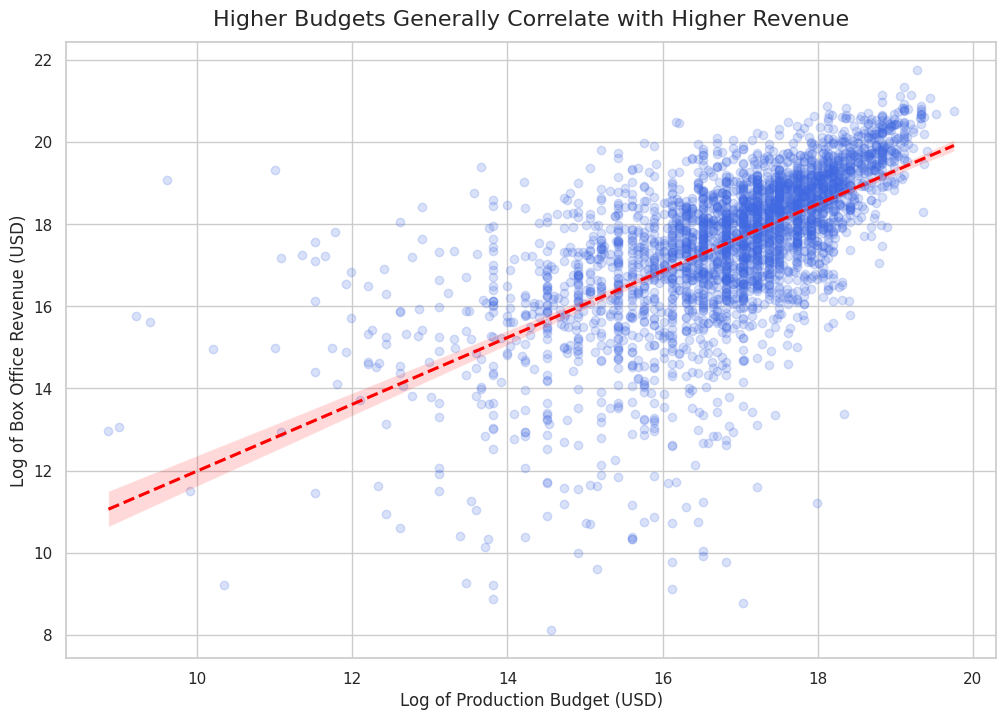

In [414]:
plt.figure(figsize=(12, 8))
ax = sns.regplot(
    data=df_viz,
    x='log_budget',
    y='log_revenue',
    scatter_kws={'alpha': 0.2, 'color': 'royalblue'},
    line_kws={'color': 'red', 'linestyle': '--'}
)
ax.set_title('Higher Budgets Generally Correlate with Higher Revenue', fontdict={'fontsize':16}, pad=12)
ax.set_xlabel('Log of Production Budget (USD)')
ax.set_ylabel('Log of Box Office Revenue (USD)')
plt.show()

The clear upward trend is a direct visualization of the "strong association" between budget and revenue that we hypothesized.
However, the key to our story is the wide cloud of data points around the line. If budget were the only factor, all the points would be tightly clustered around the red line. The significant spread shows that many movies with similar budgets achieve wildly different revenues.

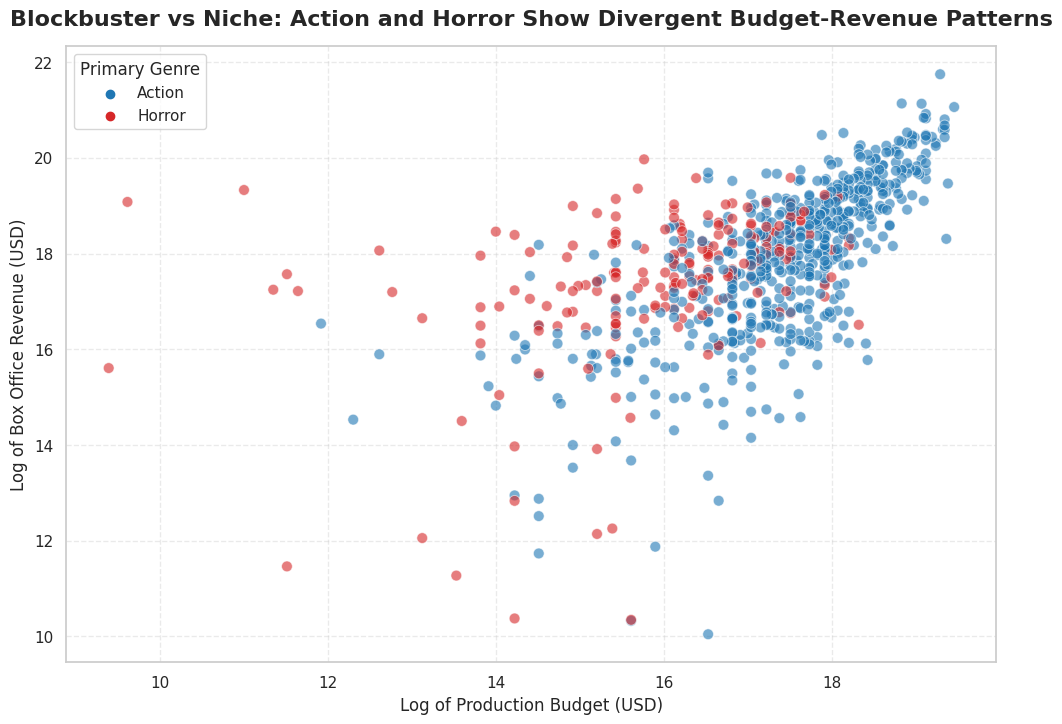

In [415]:
df_action_horror = df_viz[df_viz['primary_genre'].isin(['Action', 'Horror'])]

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    data=df_action_horror,
    x='log_budget',
    y='log_revenue',
    hue='primary_genre',
    palette={'Action': 'tab:blue', 'Horror': 'tab:red'},
    alpha=0.6,
    s=60
)

# Customize
ax.set_title(
    'Blockbuster vs Niche: Action and Horror Show Divergent Budget-Revenue Patterns',
    fontdict={'fontsize': 16, 'weight': 'bold'}, 
    pad=15
)
ax.set_xlabel('Log of Production Budget (USD)', fontsize=12)
ax.set_ylabel('Log of Box Office Revenue (USD)', fontsize=12)
ax.legend(title='Primary Genre', fontsize=11, title_fontsize=12)
ax.grid(True, linestyle='--', alpha=0.4)

plt.show()

Action films show a strong budget–revenue correlation, while Horror films succeed even with low budgets, highlighting how genre moderates the relationship.


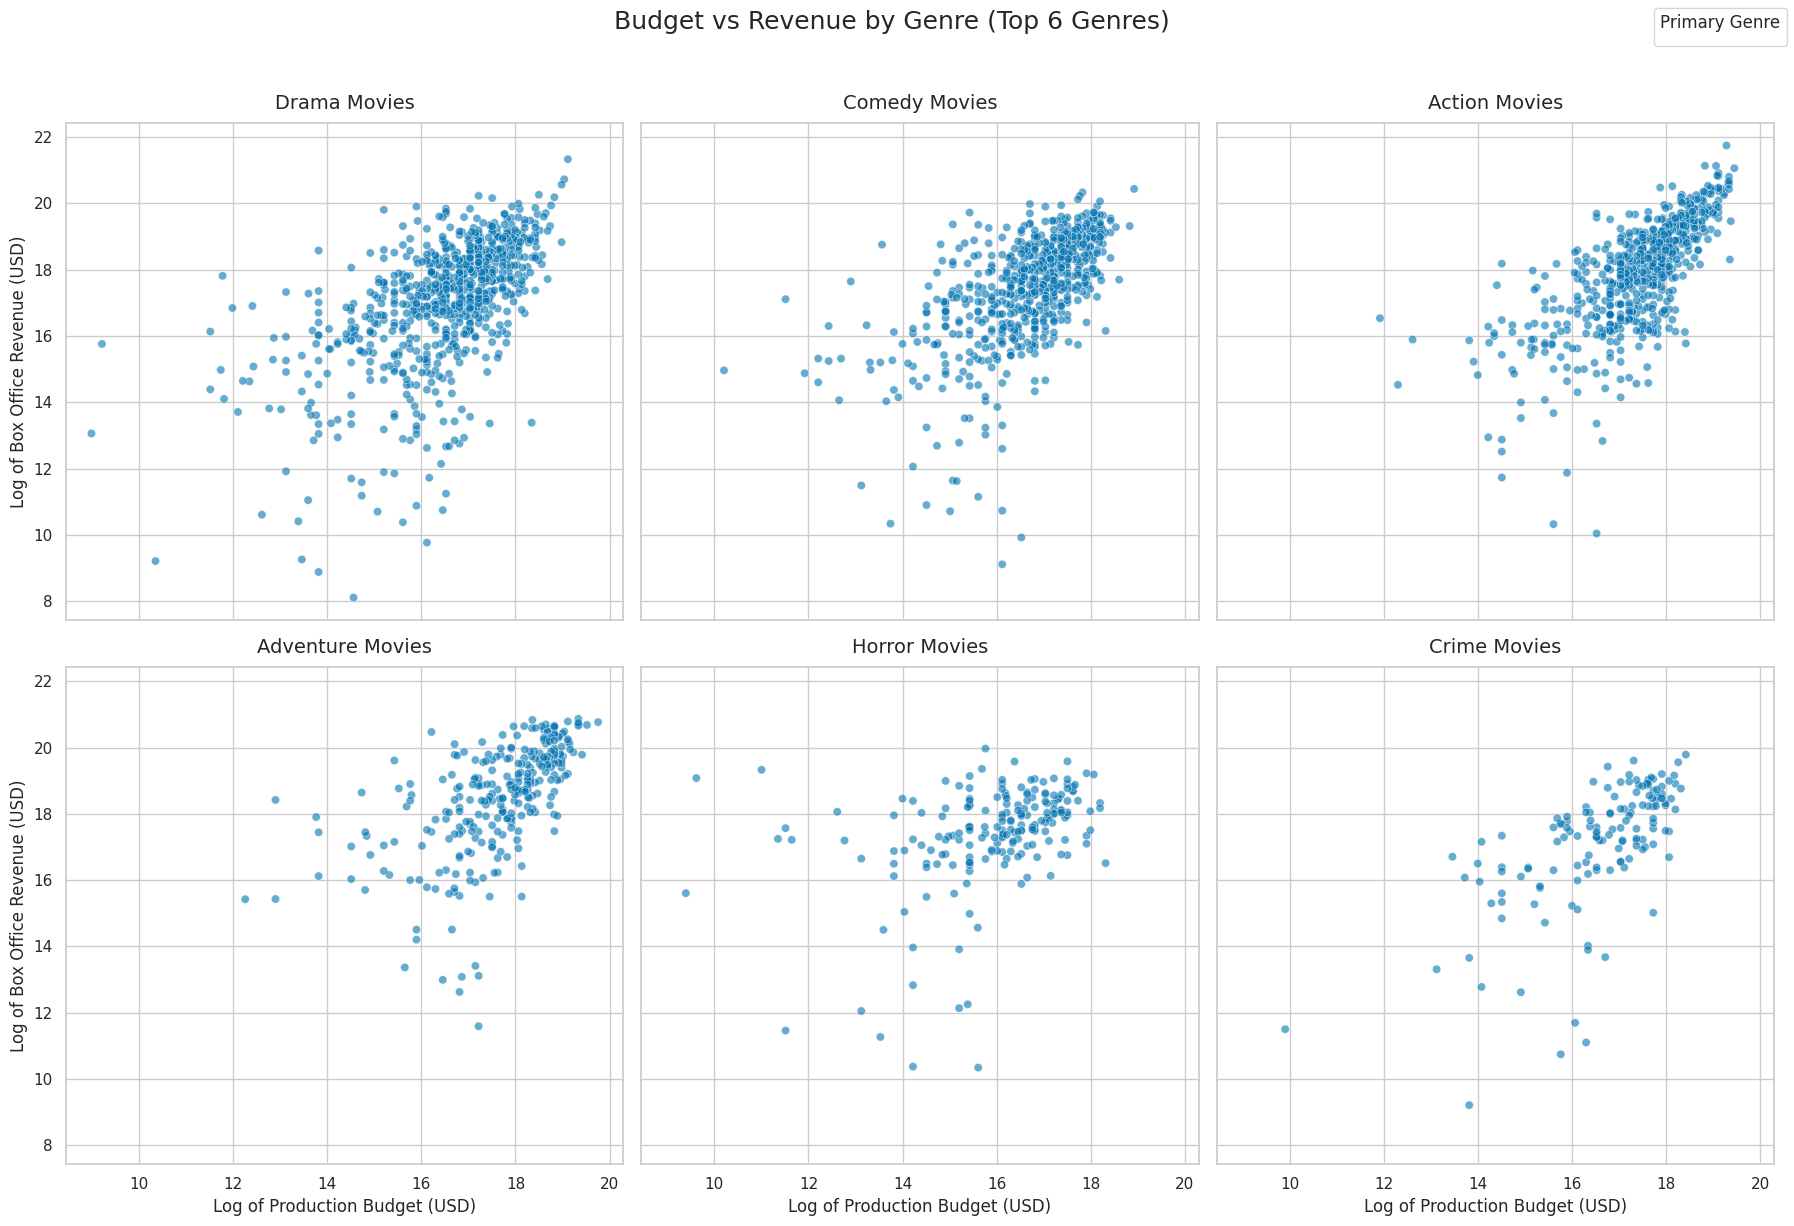

In [416]:
# Get top 6 genres
top_genres_list = df_viz['primary_genre'].value_counts().nlargest(6).index
df_top6_genres = df_viz[df_viz['primary_genre'].isin(top_genres_list)]

# Create subplots (2 rows × 3 columns for 6 genres)
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each genre separately
for i, genre in enumerate(top_genres_list):
    ax = axes[i]
    genre_df = df_top6_genres[df_top6_genres['primary_genre'] == genre]
    
    sns.scatterplot(
        data=genre_df,
        x='log_budget',
        y='log_revenue',
        hue='primary_genre',
        palette='colorblind',
        alpha=0.6,
        ax=ax,
        legend=False
    )
    
    ax.set_title(f"{genre} Movies", fontsize=14, pad=10)
    ax.set_xlabel("Log of Production Budget (USD)")
    ax.set_ylabel("Log of Box Office Revenue (USD)")

# Add one legend outside the plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Primary Genre", loc="upper right")

plt.suptitle("Budget vs Revenue by Genre (Top 6 Genres)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

The plots show that higher budgets generally lead to higher revenues, but the strength of this relationship varies by genre—strongest in action and adventure, and much weaker in genres like horror and drama where lower-budget films can still succeed. This supports the hypothesis that genre moderates the budget–revenue link.

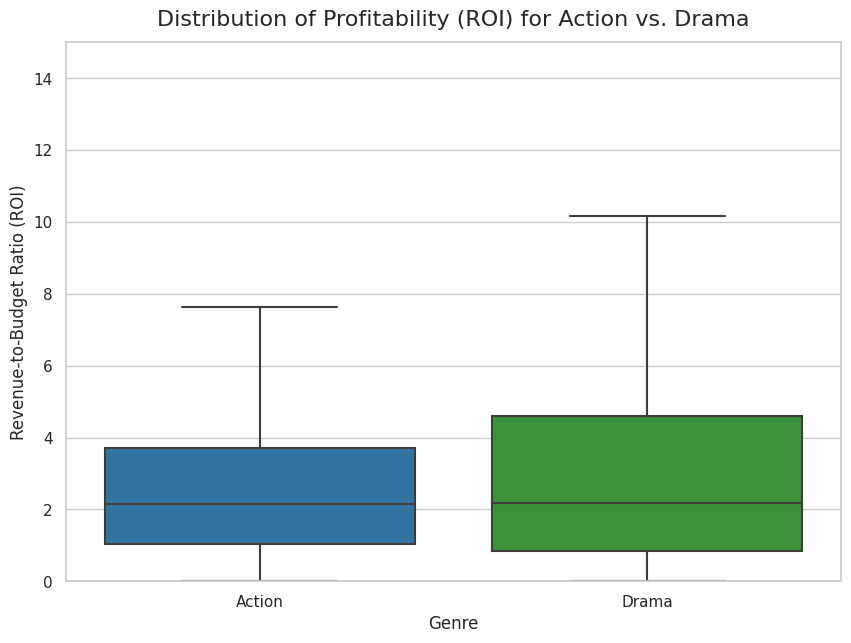

In [417]:
# Consistent palette and clear labels for comparison
plt.figure(figsize=(10, 7))
ax = sns.boxplot(
    data=df_action_drama,
    x='plot_genre',
    y='rev_to_budget',
    palette={'Action': '#1f77b4', 'Drama': '#2ca02c'},  # consistent custom colors
    showfliers=False
)

# Match y-axis scale for fair comparison
ax.set_ylim(0, 15)

# Titles & labels consistent with earlier plots
ax.set_title('Distribution of Profitability (ROI) for Action vs. Drama', fontsize=16, pad=12)
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Revenue-to-Budget Ratio (ROI)', fontsize=12)

plt.show()

This boxplot shows that **Drama films tend to have higher ROI variation than Action films**, suggesting that while both can be profitable, **genre moderates the budget–revenue relationship**, supporting the hypothesis that budget alone does not fully explain success.

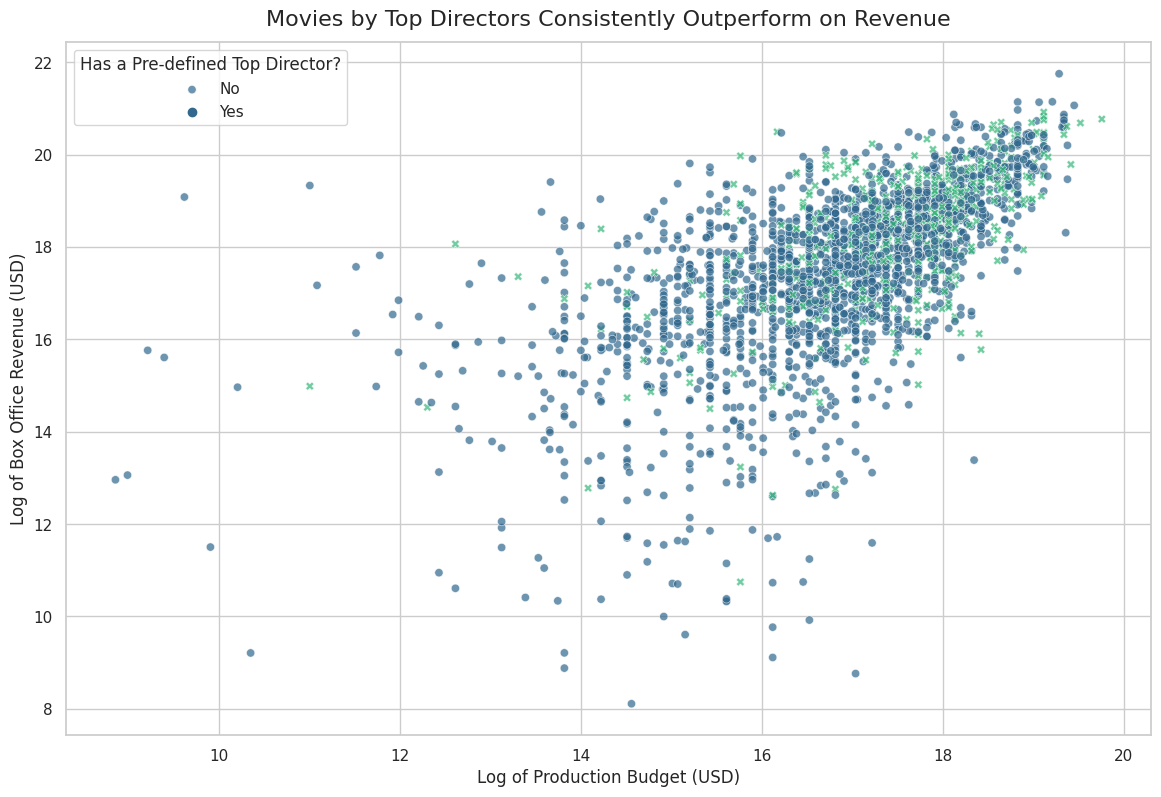

In [274]:
plt.figure(figsize=(14, 9))
ax = sns.scatterplot(
    data=df_viz.sample(frac=0.8, random_state=1),
    x='log_budget',
    y='log_revenue',
    hue='has_top_director', # Using our new flag!
    style='has_top_director',
    palette='viridis',
    alpha=0.7
)
ax.set_title('Movies by Top Directors Consistently Outperform on Revenue', fontdict={'fontsize':16}, pad=12)
ax.set_xlabel('Log of Production Budget (USD)')
ax.set_ylabel('Log of Box Office Revenue (USD)')
ax.legend(title='Has a Pre-defined Top Director?', labels=['No', 'Yes'])
plt.show()

This scatter plot revisits the core relationship between budget and revenue. This time, however, it distinguishes between films made by a pre-defined "top director" (green 'x's) and all other films (blue dots). A clear visual separation emerges: the green 'x's are not randomly distributed but are predominantly located in the upper half of the overall data cloud.

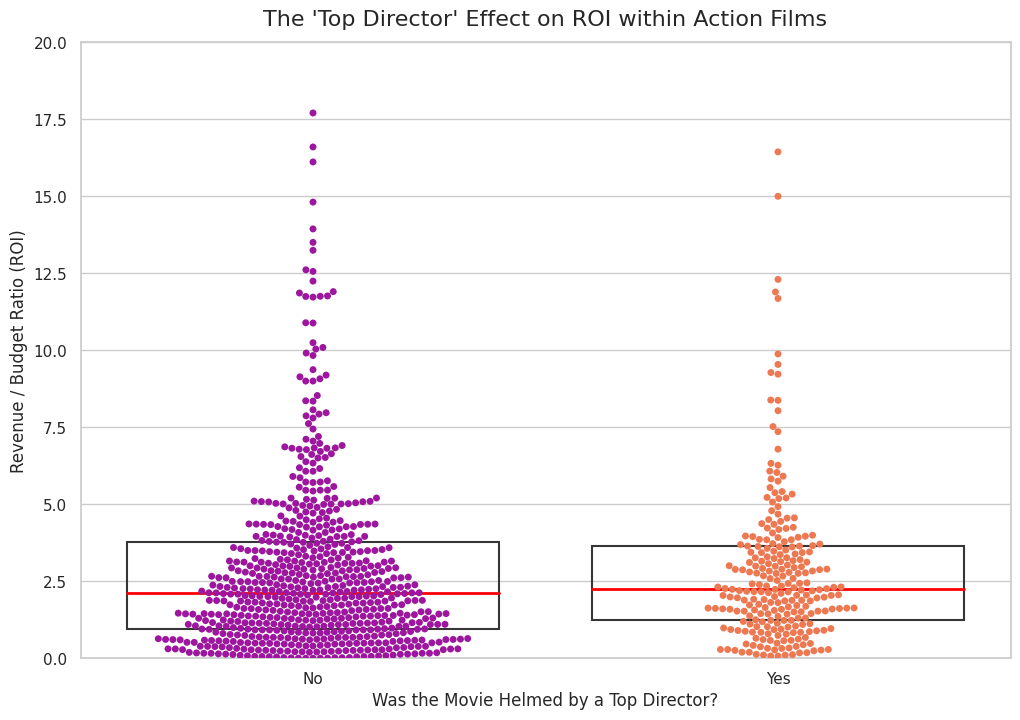

In [275]:
# Filter for only Action movies
df_action = df_viz[df_viz['genre_Action'] == 1].copy()

plt.figure(figsize=(12, 8))
ax = sns.swarmplot(
    data=df_action,
    x='has_top_director',
    y='rev_to_budget', # Your profitability metric!
    palette='plasma'
)
sns.boxplot( # Overlay a boxplot for summary stats
    data=df_action,
    x='has_top_director',
    y='rev_to_budget',
    palette='plasma',
    boxprops={'facecolor':'None'},
    showcaps=False, whiskerprops={'linewidth':0},
    showfliers=False, medianprops={'color':'red', 'linewidth':2}
)

# Set y-axis limit and add titles/labels
ax.set_ylim(0, 20)
ax.set_title("The 'Top Director' Effect on ROI within Action Films", fontdict={'fontsize':16}, pad=12)
ax.set_xlabel('Was the Movie Helmed by a Top Director?')
ax.set_xticklabels(['No', 'Yes'])
ax.set_ylabel('Revenue / Budget Ratio (ROI)')
plt.show()

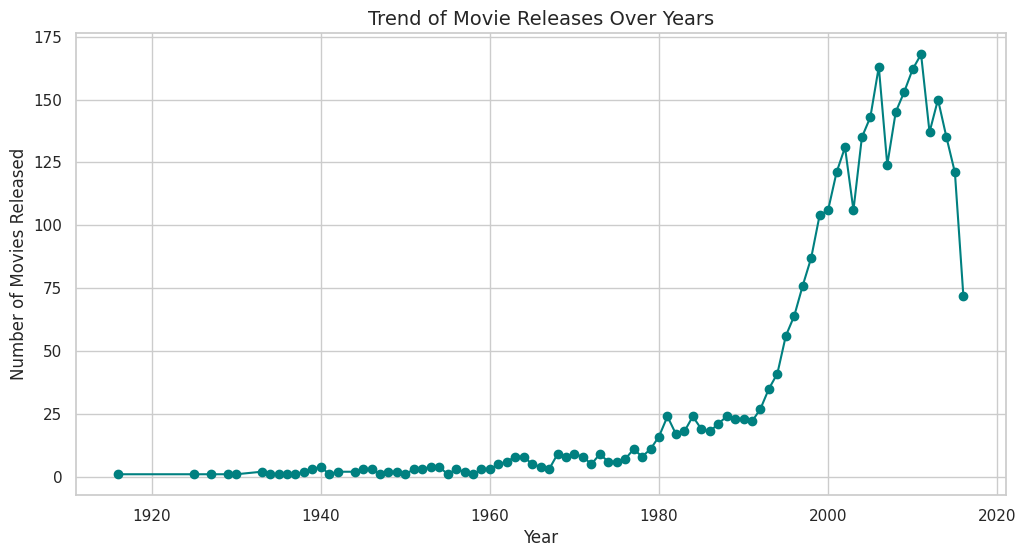

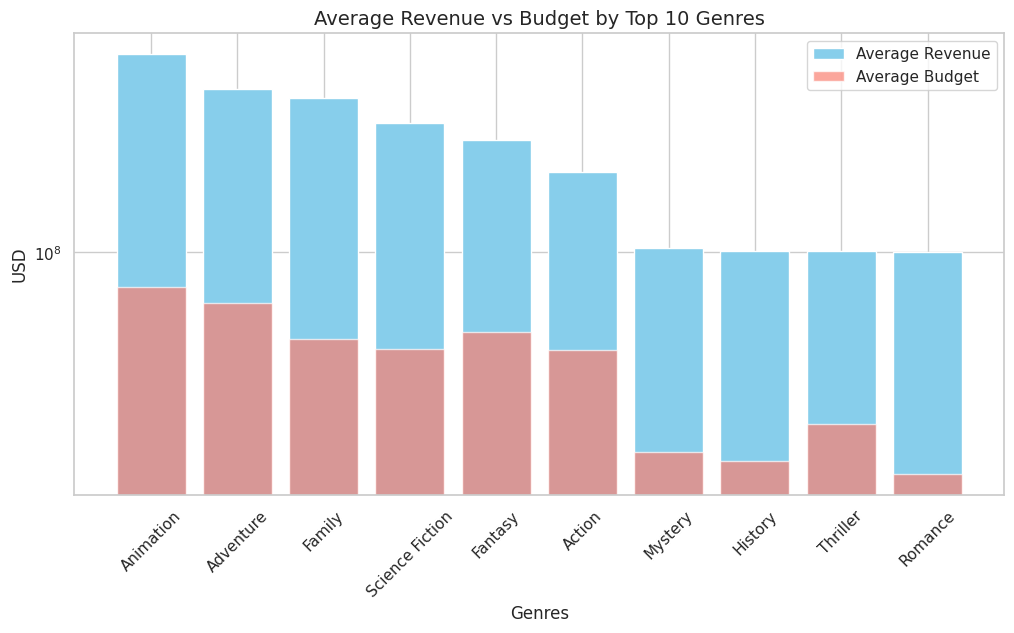

In [278]:
# Average Revenue & Budget per top 10 genres
avg_rev_budget = df_viz.groupby('primary_genre')[['revenue','budget']].mean().sort_values('revenue', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(avg_rev_budget.index, avg_rev_budget['revenue'], color='skyblue', label='Average Revenue')
ax.bar(avg_rev_budget.index, avg_rev_budget['budget'], color='salmon', alpha=0.7, label='Average Budget')
ax.set_title("Average Revenue vs Budget by Top 10 Genres")
ax.set_ylabel("USD")
ax.set_xlabel("Genres")
ax.set_yscale("log")
ax.legend()
plt.xticks(rotation=45)
plt.show()

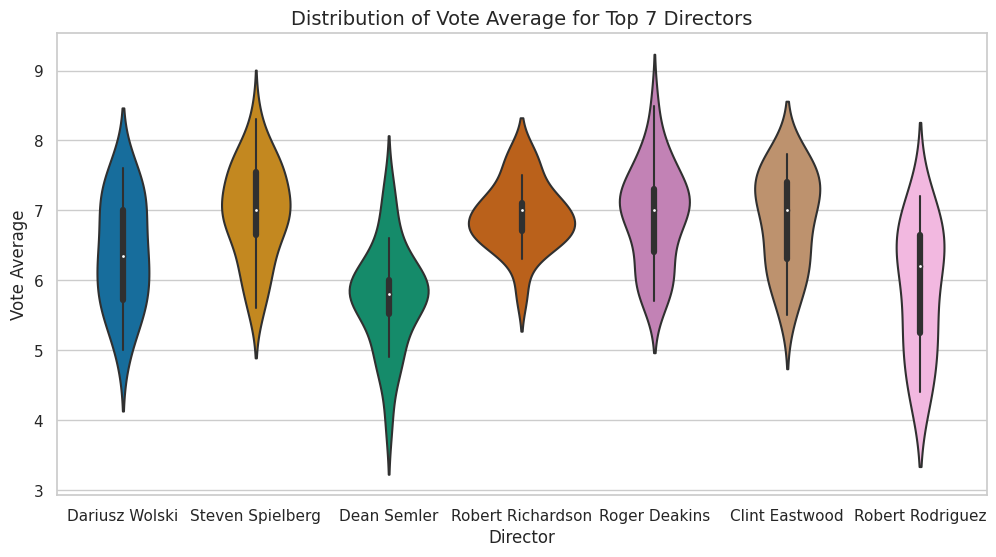

In [279]:
top_directors = df_viz['primary_director'].value_counts().head(7).index
plt.figure(figsize=(12,6))
sns.violinplot(x='primary_director', y='vote_average', data=df_final[df_final['primary_director'].isin(top_directors)], palette='colorblind')
plt.title("Distribution of Vote Average for Top 7 Directors")
plt.xlabel("Director")
plt.ylabel("Vote Average")
plt.grid(True, axis='y')
plt.show()

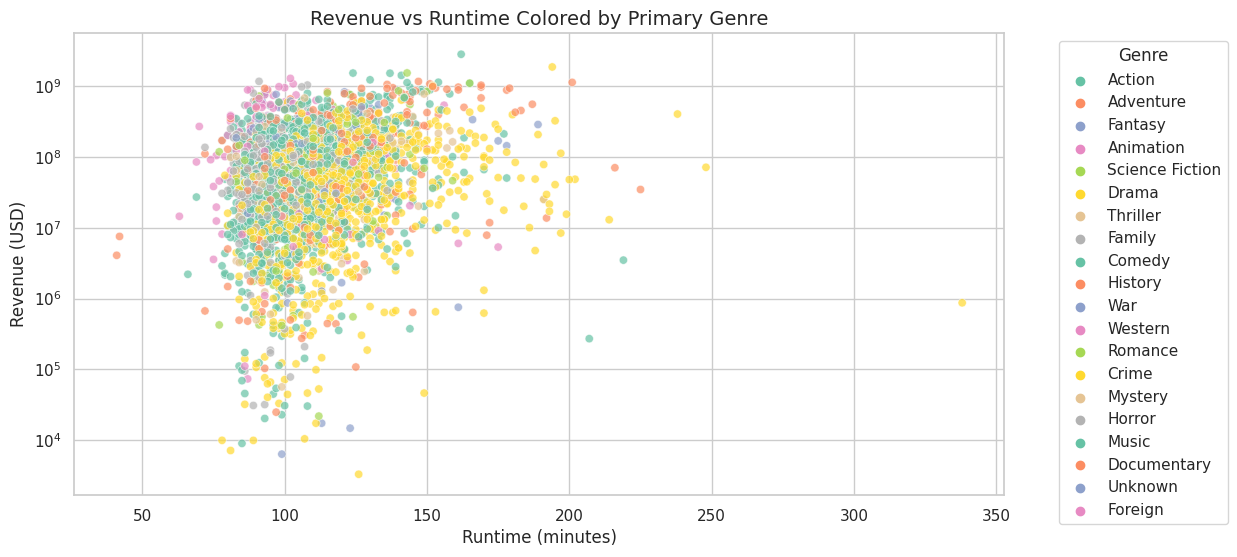

In [280]:
# Revenue vs Runtime by Genre
plt.figure(figsize=(12,6))
sns.scatterplot(x='runtime', y='revenue', hue='primary_genre', data=df_viz, palette='Set2', alpha=0.7)
plt.title("Revenue vs Runtime Colored by Primary Genre")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Revenue (USD)")
plt.yscale('log')
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Data Story

### **Conclusion of Data Story**

Our initial hypothesis stated that *higher production budgets are strongly associated with higher box office revenue, but this relationship is moderated by genre and the presence of a proven director.*

1. **Budget vs Revenue (Overall Trend):**
   We observed a strong positive correlation between production budget and box office revenue. However, the relationship showed diminishing returns at higher budget levels, suggesting that simply spending more does not guarantee proportional revenue growth.

2. **Budget–Revenue by Genre (Scatterplots):**
   Breaking down the relationship by genre revealed meaningful differences. Action and Adventure films tended to generate consistently high revenues at higher budgets, while Drama and Comedy showed more variability, indicating genre-specific dynamics that influence returns.

3. **Profitability (ROI) Across Genres (Boxplots):**
   ROI distributions highlighted that Drama films, while often made on smaller budgets, sometimes achieved higher proportional returns compared to Action films, which typically had higher revenues but more modest ROI ratios. This partially supports our hypothesis that genre moderates the budget–revenue link.

4. **Runtime vs Revenue (Scatterplots by Genre):**
   When examining runtime, no clear linear relationship with revenue emerged. However, separating by genre showed clustering—Action and Adventure films often leaned toward longer runtimes with higher revenues, while Comedies and Dramas were more spread out, suggesting runtime is a weak predictor unless considered alongside genre.

---

### **Final Takeaways**

* **Hypothesis Support:** The hypothesis is largely supported. Budgets do predict revenues, but the strength of the relationship varies across genres.
* **Key Insights:**

  * High-budget Action/Adventure films dominate in absolute revenue.
  * Dramas, despite smaller budgets, can achieve higher ROI.
  * Runtime has little independent explanatory power but interacts subtly with genre.
* **Unexpected Insight:** Profitability (ROI) does not always scale with budget—smaller films in certain genres can outperform larger ones on a proportional basis.

**In summary, budget remains a powerful driver of box office performance, but genre plays a moderating role in shaping both revenue potential and profitability.**

## Extras [Ignore]

In [281]:
df = merged_movies_df.copy()
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [282]:
# ---------- Helpers ----------
def _to_list(x):
    if isinstance(x, list): return x
    if pd.isna(x): return []
    try: return json.loads(x)
    except Exception:
        try: return ast.literal_eval(x)
        except Exception: return []

def _names(lst):
    out=[]
    for d in lst:
        if isinstance(d, dict) and d.get("name"): out.append(d["name"])
    return out

def _first_genre(x):
    g = _to_list(x)
    for d in g:
        if isinstance(d, dict) and d.get("name"): return d["name"]
    return np.nan

def _director(x):
    for d in _to_list(x):
        if isinstance(d, dict) and d.get("job")=="Director" and d.get("name"):
            return d["name"]
    return np.nan

In [283]:
# ---------- Basic fixes ----------
# Keep only released films to avoid pre-release/out-of-distribution noise for revenue tests
if "status" in df.columns:
    df = df[df["status"].eq("Released") | df["status"].isna()]

In [284]:
# Resolve duplicate columns from merge (keep canonical title)
drop_cols = [c for c in ["title_y","movie_id"] if c in df.columns]
df = df.drop(columns=drop_cols)
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [285]:
# Parse dates for time dynamics
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["year"]   = df["release_date"].dt.year
df["decade"] = (df["year"]//10)*10

In [286]:
# ---------- JSON -> usable features ----------
df["genres_list"] = df["genres"].apply(lambda s: _names(_to_list(s)))
df["primary_genre"] = df["genres"].apply(_first_genre)

df["cast_list"] = df["cast"].apply(_to_list)
df["number_of_actors"] = df["cast_list"].apply(len)

df["director"] = df["crew"].apply(_director)
df["director_film_count"] = df.groupby("director")["id"].transform("count")
df["proven_director"] = df["director_film_count"].ge(5)  # heuristic: ≥5 films = "proven" for moderation

In [287]:
# ---------- Numeric coercion & missing values ----------
# Treat 0 budget/revenue as missing (common in TMDB); drop for causal/correlation integrity
for col in ["budget","revenue","runtime","vote_average","vote_count","popularity"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

df["budget"].replace(0, np.nan, inplace=True)
df["revenue"].replace(0, np.nan, inplace=True)

In [288]:
# Impute runtime by primary_genre median, fallback to global median (keeps rows for secondary questions)
genre_rt_med = df.groupby("primary_genre")["runtime"].transform("median")
df["runtime"] = df["runtime"].fillna(genre_rt_med).fillna(df["runtime"].median())

In [289]:
# Drop rows lacking core targets (budget & revenue) necessary for hypothesis tests
df = df.dropna(subset=["budget","revenue"])

In [290]:
# ---------- Transformations for analyses ----------
df["log_budget"]   = np.log1p(df["budget"])    # log1p → diminishing returns view
df["log_revenue"]  = np.log1p(df["revenue"])
df["rev_to_budget"] = (df["revenue"] / df["budget"]).replace([np.inf, -np.inf], np.nan)

In [291]:
# Budget bins (deciles) for “control-by-budget” comparisons (e.g., director influence)
df["budget_bin"] = pd.qcut(df["budget"], q=10, labels=False, duplicates="drop")

In [292]:
# Top genres flag (focus moderation on most represented genres for power)
top_genres = df["primary_genre"].value_counts().head(10).index.tolist()
df["primary_genre_top10"] = df["primary_genre"].where(df["primary_genre"].isin(top_genres), other="Other")

In [293]:
# Top 5 prolific directors for direct tests on rating distributions
top5_dirs = df["director"].value_counts().head(5).index.tolist()
df["top5_director"] = df["director"].isin(top5_dirs)

In [294]:
# Final tidy: drop heavy raw JSON if desired; keep minimal analytic columns
movies_clean = df.drop(columns=[c for c in ["genres","cast","crew","cast_list"] if c in df.columns])

In [295]:
print(movies_clean[["budget","revenue","runtime","primary_genre","number_of_actors","director","proven_director","log_budget","log_revenue","rev_to_budget","budget_bin"]].head())
print(movies_clean.isna().sum()[["budget","revenue","runtime","primary_genre","director"]])

        budget       revenue  runtime primary_genre  number_of_actors  \
0  237000000.0  2.787965e+09    162.0        Action                83   
1  300000000.0  9.610000e+08    169.0     Adventure                34   
2  245000000.0  8.806746e+08    148.0        Action                83   
3  250000000.0  1.084939e+09    165.0        Action               158   
4  260000000.0  2.841391e+08    132.0        Action                27   

            director  proven_director  log_budget  log_revenue  rev_to_budget  \
0      James Cameron             True   19.283571    21.748578      11.763566   
1     Gore Verbinski             True   19.519293    20.683485       3.203333   
2         Sam Mendes             True   19.316769    20.596199       3.594590   
3  Christopher Nolan             True   19.336971    20.804790       4.339756   
4     Andrew Stanton            False   19.376192    19.464974       1.092843   

   budget_bin  
0           9  
1           9  
2           9  
3         

### Advanced Visualizations [10 points]


Create the following visualizations to test your hypothesis. Each plot should be highly
customized following the seven commandments of plotting.
1. Distribution of Success: Use seaborn to create a pair plot illustrating the relationships
between key numerical variables: budget, revenue, runtime, and vote average. This will
give you a high-level overview of their correlations.
2. Time-Series Analysis:
○ Visualize the trend of movie releases over time using a line plot.
○ Create a stacked area chart using matplotlib to show the change in the number
of movies released for the top 5 genres over the years. This requires you first to
process the genre data.
3. Revenue & Ratings Breakdown:
○ Create a violin plot using seaborn to compare the distribution of vote_average
for the top 5 directors with the highest number of movies.
○ Create a bar chart that compares the average revenue and budget for each of
the top 10 genres. Use matplotlib to plot both on the same axes for a direct
comparison.
4. Correlation Matrix: Generate a comprehensive heatmap of the correlation matrix for all
numerical variables. This should be visually appealing and help you identify hidden
relationships.
5. Your creativity: Besides the above, can you devise other nuanced visualizations to tell
an engaging story? [+5 Brownie points]


In [296]:
df = movies_clean.copy()
df.head(1)

,budget,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,number_of_actors,director,director_film_count,proven_director,log_budget,log_revenue,rev_to_budget,budget_bin,primary_genre_top10,top5_director
0,237000000.0,http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,83,James Cameron,7.0,True,19.283571,21.748578,11.763566,9,Action,False


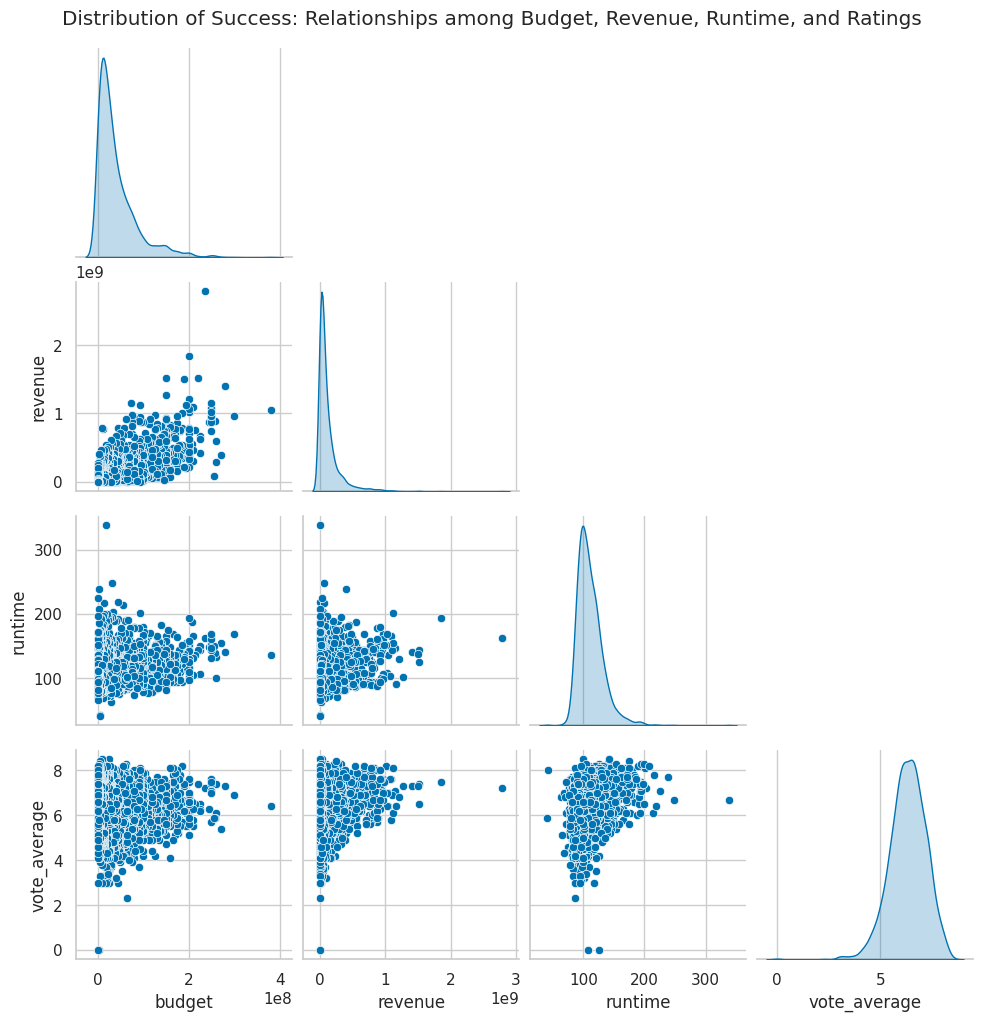

In [297]:
# --- 1. Distribution of Success (pairplot) ---
sns.pairplot(df[["budget","revenue","runtime","vote_average"]], diag_kind="kde", corner=True)
plt.suptitle("Distribution of Success: Relationships among Budget, Revenue, Runtime, and Ratings", y=1.02)
plt.show()

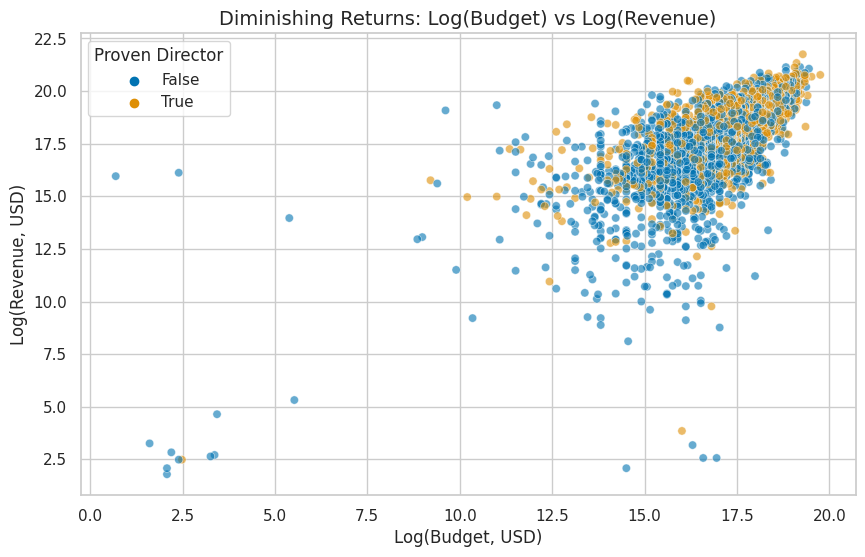

In [298]:
# 2. Budget-Revenue Dynamics
sns.scatterplot(data=df, x="log_budget", y="log_revenue", hue="proven_director", alpha=0.6)
plt.title("Diminishing Returns: Log(Budget) vs Log(Revenue)")
plt.xlabel("Log(Budget, USD)"); plt.ylabel("Log(Revenue, USD)")
plt.legend(title="Proven Director")
plt.show()

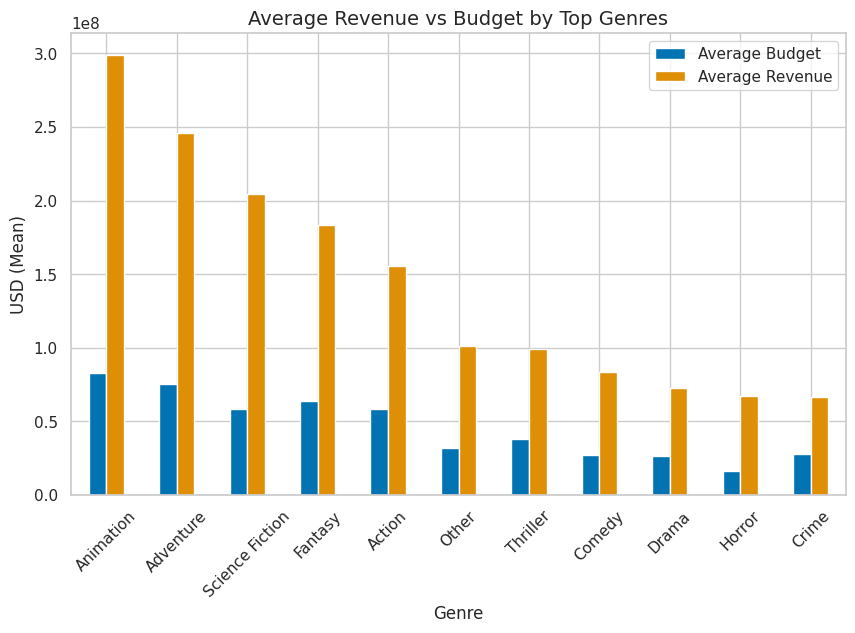

In [299]:
# 3. Genre Moderation
genre_stats = df.groupby("primary_genre_top10")[["budget","revenue"]].mean().sort_values("revenue", ascending=False)
genre_stats.plot(kind="bar")
plt.title("Average Revenue vs Budget by Top Genres")
plt.xlabel("Genre"); plt.ylabel("USD (Mean)")
plt.legend(["Average Budget","Average Revenue"])
plt.xticks(rotation=45)
plt.show()

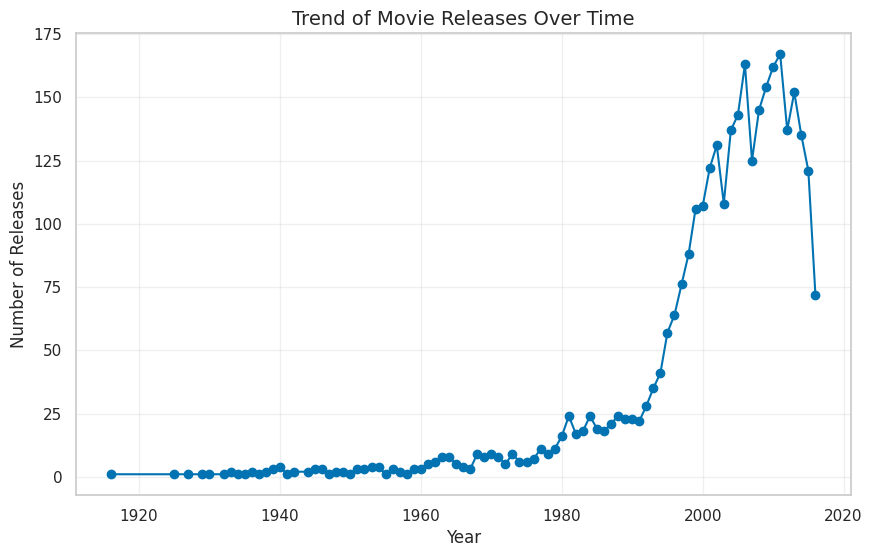

In [300]:
# --- 2. Time-Series Analysis ---
# (a) Releases over time
release_trend = df.groupby("year")["id"].count()
plt.figure()
release_trend.plot(marker="o")
plt.title("Trend of Movie Releases Over Time")
plt.xlabel("Year"); plt.ylabel("Number of Releases")
plt.grid(True, alpha=0.3)
plt.show()

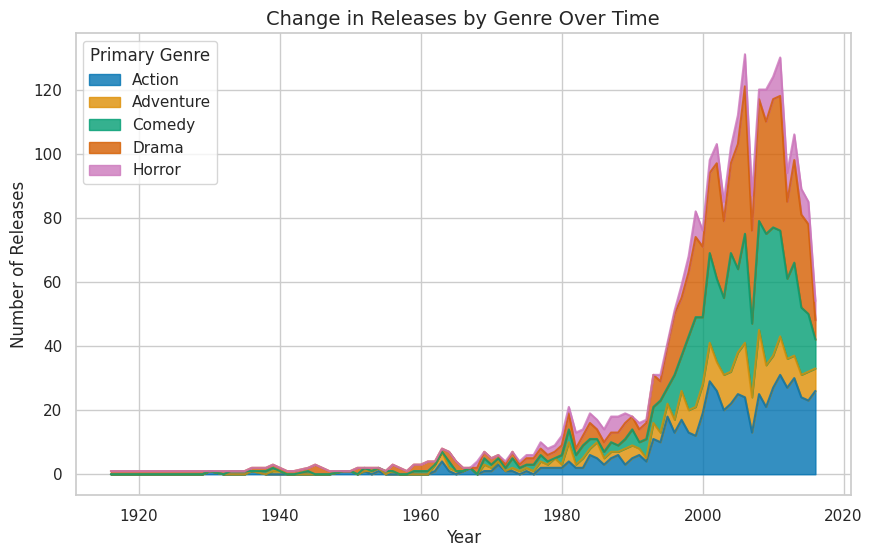

In [301]:
# (b) Stacked area for top 5 genres
top5 = df["primary_genre"].value_counts().head(5).index
genre_year = (df[df["primary_genre"].isin(top5)]
              .groupby(["year","primary_genre"])["id"].count()
              .unstack(fill_value=0))
genre_year.plot.area(alpha=0.8)
plt.title("Change in Releases by Genre Over Time")
plt.xlabel("Year"); plt.ylabel("Number of Releases")
plt.legend(title="Primary Genre")
plt.show()

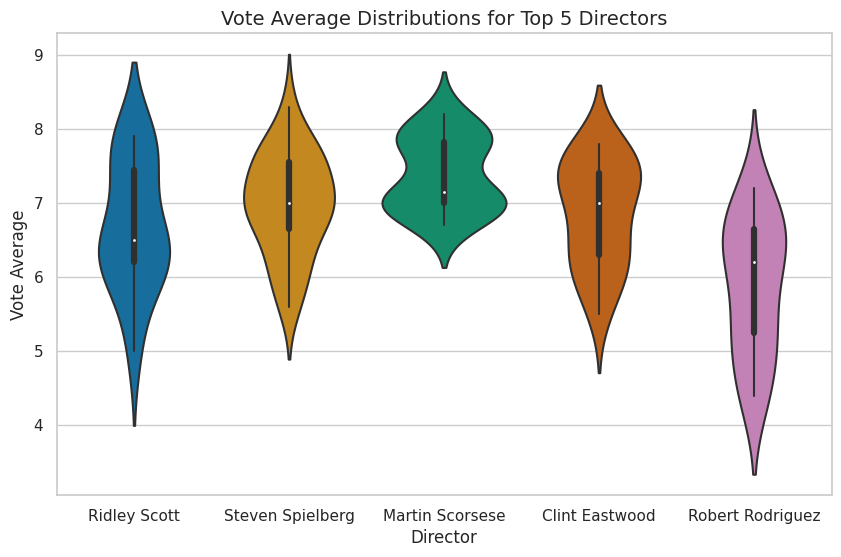

In [302]:
# 5. Director Influence
top5_dirs = df["director"].value_counts().head(5).index
sns.violinplot(data=df[df["director"].isin(top5_dirs)], x="director", y="vote_average", palette="colorblind")
plt.title("Vote Average Distributions for Top 5 Directors")
plt.xlabel("Director"); plt.ylabel("Vote Average")
plt.show()

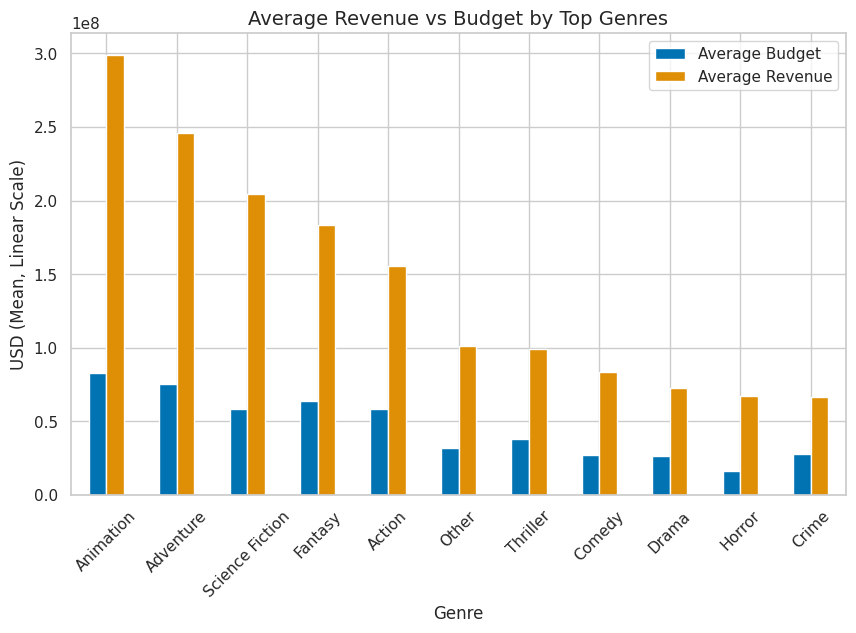

In [303]:
# (b) Bar chart avg revenue vs budget by genre
genre_stats = df.groupby("primary_genre_top10")[["budget","revenue"]].mean().sort_values("revenue", ascending=False)
ax = genre_stats.plot(kind="bar")
plt.title("Average Revenue vs Budget by Top Genres")
plt.xlabel("Genre"); plt.ylabel("USD (Mean, Linear Scale)")
plt.legend(["Average Budget","Average Revenue"])
plt.xticks(rotation=45)
plt.show()

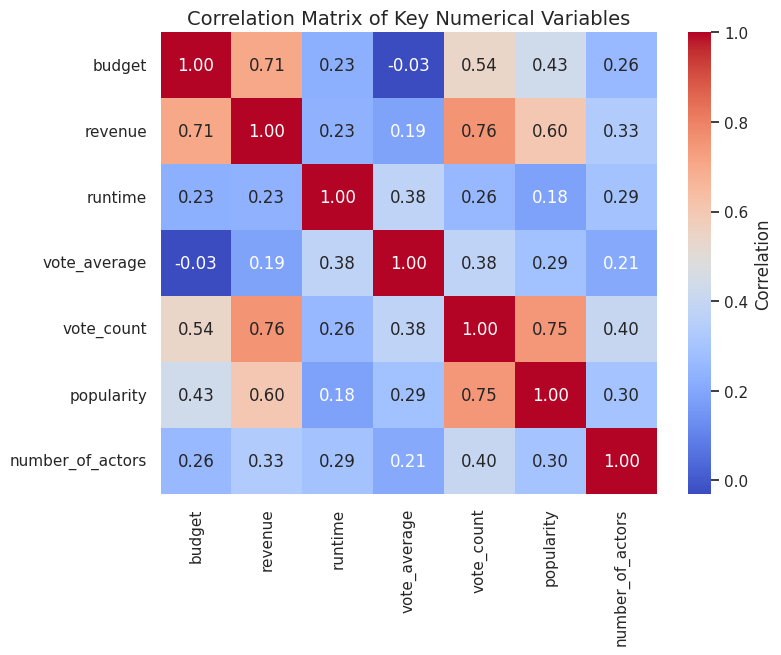

In [304]:
# --- 4. Correlation Matrix ---
plt.figure(figsize=(8,6))
corr = df[["budget","revenue","runtime","vote_average","vote_count","popularity","number_of_actors"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix of Key Numerical Variables")
plt.show()

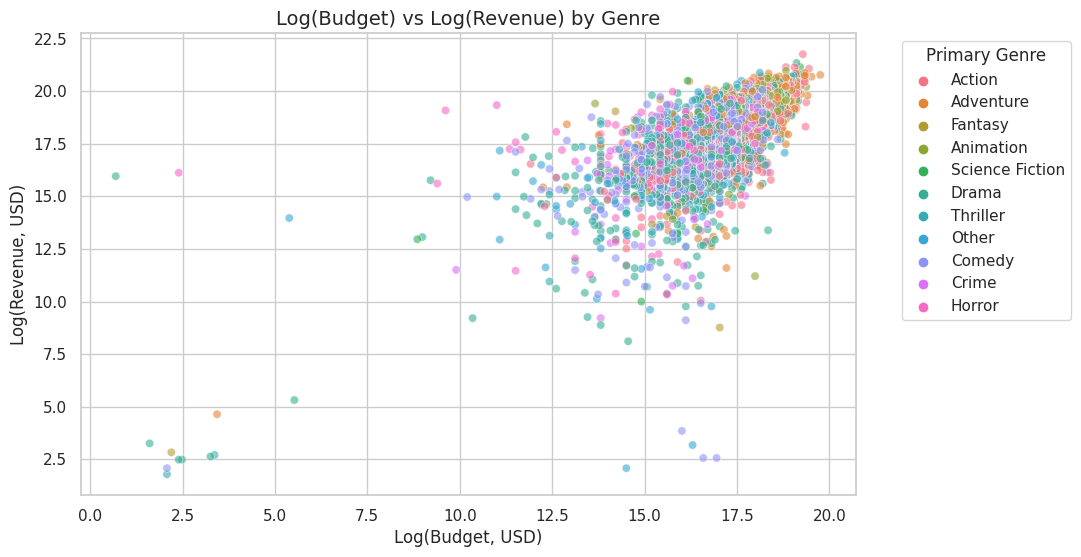

In [305]:
# 7. Creative Storytelling Visualization
sns.scatterplot(data=df, x="log_budget", y="log_revenue", hue="primary_genre_top10", alpha=0.6)
plt.title("Log(Budget) vs Log(Revenue) by Genre")
plt.xlabel("Log(Budget, USD)"); plt.ylabel("Log(Revenue, USD)")
plt.legend(title="Primary Genre", bbox_to_anchor=(1.05,1))
plt.show()

### The Data Story [30 points]

Your final deliverable is not just a collection of plots. You must create a single Jupyter Notebook
that acts as a complete data story.
* Start with your hypothesis.
* Walk through your data preprocessing steps, showing how you prepared the data.
* Present your visualizations in a logical order, each with a brief text block explaining what
it shows and how it relates to your hypothesis.
* Conclude with a clear, concise summary of your findings. Did your visualizations prove
or disprove your hypothesis? What unexpected insights did you discover?
This assignment challenges you to think critically about data, clean it effectively, visualize
complex relationships, and communicate your findings in a structured and compelling manner